In [ ]:
import numpy as np
import torch
from torch import nn as nn
import matplotlib.pyplot as plt

device="cuda" if(torch.cuda.is_available()) else "cpu"

In [ ]:
x=torch.arange(0,1,0.02)
x=x.unsqueeze(dim=1)
y=0.7*x + 0.3

In [ ]:
percent=0.8
len=x.shape[0]
x_train,y_train=x[:int(percent*len)],y[:int(percent*len)]
print(f"length of training sets = x_train : {x_train.shape[0]} , y_train: {y_train.shape[0]}")
x_test,y_test=x[int(percent*len):],y[int(percent*len):]
print(f"length of training sets = x_test : {x_test.shape[0]} , y_test: {y_test.shape[0]}")

length of training sets = x_train : 40 , y_train: 40
length of training sets = x_test : 10 , y_test: 10


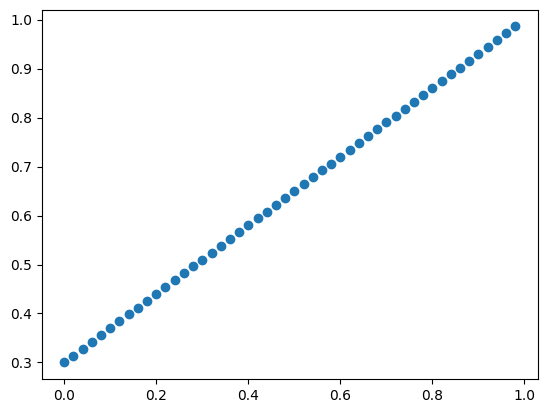

In [ ]:
plt.scatter(x,y)
plt.show()

In [ ]:
class reg_model(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_layer=nn.Linear(in_features=1,out_features=1)

  def forward(self,x:torch.tensor)->torch.tensor:
    return self.linear_layer(x)


In [ ]:
torch.manual_seed(42)
model_1=reg_model()
model_1.to(device)
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.8300], device='cuda:0'))])

In [ ]:
next(model_1.parameters()).device

device(type='cuda', index=0)

In [ ]:
loss_fn=nn.L1Loss()

In [ ]:
optimizer=torch.optim.SGD(params=model_1.parameters(),lr=0.01)

In [ ]:
epochs=100
x_train=x_train.to(device)
y_train=y_train.to(device)
x_test=x_test.to(device)
y_test=y_test.to(device)
for epoch in range(epochs):
  model_1.train()
  y_preds=model_1(x_train)
  loss=loss_fn(y_preds,y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  print(f"loss is : {loss}")
  model_1.eval()
  with torch.inference_mode():
    pred=model_1(x_test)


loss is : 0.5551779866218567
loss is : 0.5436570048332214
loss is : 0.5321359634399414
loss is : 0.5206149816513062
loss is : 0.5090939998626709
loss is : 0.49757298827171326
loss is : 0.4860520362854004
loss is : 0.47453102469444275
loss is : 0.4630100429058075
loss is : 0.45148906111717224
loss is : 0.439968079328537
loss is : 0.42844706773757935
loss is : 0.4169261157512665
loss is : 0.4054051339626312
loss is : 0.3938841223716736
loss is : 0.38236314058303833
loss is : 0.3708421289920807
loss is : 0.35932111740112305
loss is : 0.3478001654148102
loss is : 0.3362792134284973
loss is : 0.3247582018375397
loss is : 0.31323719024658203
loss is : 0.3017162084579468
loss is : 0.2901952266693115
loss is : 0.2786742150783539
loss is : 0.267153263092041
loss is : 0.2556322515010834
loss is : 0.2441112995147705
loss is : 0.23259030282497406
loss is : 0.2210693210363388
loss is : 0.20954833924770355
loss is : 0.1980273425579071
loss is : 0.18650634586811066
loss is : 0.1749853491783142
loss i

In [ ]:
def plot(x_train=x_train,y_train=y_train,x_test=x_test,y_test=y_test,prediction=None):
  plt.scatter(x_train.cpu().numpy(),y_train.cpu().numpy(),c="r",s=4)
  plt.scatter(x_test.cpu().numpy(),y_test.cpu().numpy(),c="b",s=4)
  plt.scatter(x_test.cpu().numpy(),prediction,c="g",s=4)


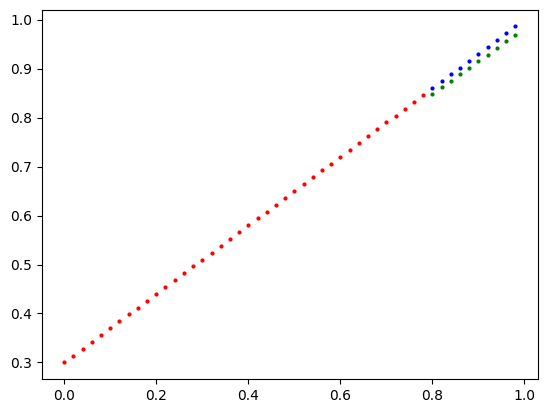

In [ ]:
plot(prediction=pred.cpu().numpy())

In [ ]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6691]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3130], device='cuda:0'))])